In [22]:
import numpy as np

In [2]:
from tensorflow.keras.datasets import reuters

In [48]:
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
# data
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [4]:
(len(train_data), len(test_data))

(8982, 2246)

In [7]:
# again we have different lengths of words in each input
len(train_data[0]), len(train_data[1])

(87, 56)

In [8]:
# decoding
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [18]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [39]:
# let's vectorize this
def vectorize_sequences(sequences, words=10000):
    """ 
    Receive a sequece of words with a specific length
    and return a array of zeros with the same dimension (len_words, how_many_words).
    For each index word we put a 1 for that word.
    """
    results = np.zeros((len(sequences), words))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [40]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [41]:
# we all have the same length
x_train[0].shape

(10000,)

In [42]:
# we need to enconde the labels
train_labels[1], test_labels[1]

(4, 10)

In [43]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [44]:
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [46]:
y_train.shape

(8982, 46)

# Building your model

In a stack of Dense layers like that you've been using, **each layer can only access information present in the output of the previous layer.** If one layer drops some information relevant to the classification problem, this information can never be recovered by later layers: information bottlenecks. 

In [50]:
# we gona use larger layers
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

- **softmax**: probability distribution over a lot of classes. In this example we have 46 categories, so the sum of the probabilities on the vector will sum up to 1.
- **categorical_crossentropy**: measure of a distance of between two probabilities distributions: the output by the model and the true distribution of the labels.

In [51]:
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Validating

In [52]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [53]:
# lets train on 20 epochs of 512 batchs
history = model.fit(x=partial_x_train, y=partial_y_train, batch_size=512, epochs=20, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 95us/sample - loss: 2.7755 - accuracy: 0.5253 - val_loss: 1.8159 - val_accuracy: 0.6500
Epoch 2/20
7982/7982 [==============================] - 0s 27us/sample - loss: 1.4622 - accuracy: 0.7002 - val_loss: 1.3122 - val_accuracy: 0.7040
Epoch 3/20
7982/7982 [==============================] - 0s 27us/sample - loss: 1.0607 - accuracy: 0.7681 - val_loss: 1.1366 - val_accuracy: 0.7460
Epoch 4/20
7982/7982 [==============================] - 0s 27us/sample - loss: 0.8298 - accuracy: 0.8240 - val_loss: 1.0391 - val_accuracy: 0.7780
Epoch 5/20
7982/7982 [==============================] - 0s 26us/sample - loss: 0.6641 - accuracy: 0.8633 - val_loss: 0.9723 - val_accuracy: 0.7960
Epoch 6/20
7982/7982 [==============================] - 0s 27us/sample - loss: 0.5291 - accuracy: 0.8939 - val_loss: 0.9197 - val_accuracy: 0.8190
Epoch 7/20
7982/7982 [==============================] - 0s 29us/sample

In [62]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]

In [57]:
import matplotlib.pyplot as plt

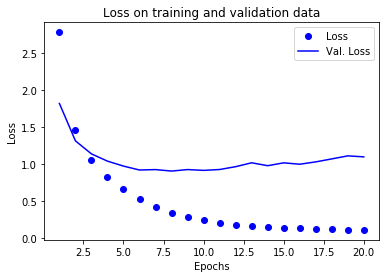

In [63]:
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Loss")
plt.plot(epochs, val_loss, "b-", label="Val. Loss")
plt.title("Loss on training and validation data")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [61]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

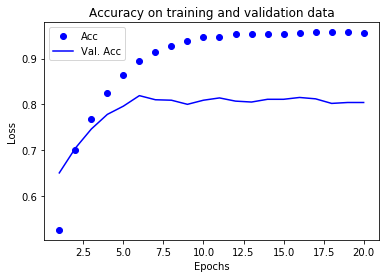

In [65]:
epochs = range(1, len(loss) + 1)
plt.plot(epochs, accuracy, "bo", label="Acc")
plt.plot(epochs, val_accuracy, "b-", label="Val. Acc")
plt.title("Accuracy on training and validation data")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [66]:
# we gona use larger layers
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
# lets train on 9 epochs of 512 batchs
# 9 epochs have the best score
model.fit(x=x_train, y=y_train, batch_size=512, epochs=9)
results = model.evaluate(x_test, y_test)

Train on 8982 samples
Epoch 1/9
8982/8982 [==============================] - 0s 55us/sample - loss: 2.5162 - accuracy: 0.5115
Epoch 2/9
8982/8982 [==============================] - 0s 24us/sample - loss: 1.3380 - accuracy: 0.7181
Epoch 3/9
8982/8982 [==============================] - 0s 23us/sample - loss: 1.0071 - accuracy: 0.7867
Epoch 4/9
8982/8982 [==============================] - 0s 25us/sample - loss: 0.7896 - accuracy: 0.8352
Epoch 5/9
8982/8982 [==============================] - 0s 24us/sample - loss: 0.6275 - accuracy: 0.8684
Epoch 6/9
8982/8982 [==============================] - 0s 23us/sample - loss: 0.5036 - accuracy: 0.8926
Epoch 7/9
8982/8982 [==============================] - 0s 23us/sample - loss: 0.4060 - accuracy: 0.9136
Epoch 8/9
8982/8982 [==============================] - 0s 25us/sample - loss: 0.3315 - accuracy: 0.9289
Epoch 9/9
2246/2246 [==============================] - 0s 76us/sample - loss: 0.9774 - accuracy: 0.7939


In [67]:
results

[0.9773555954757378, 0.7938557]

We have approximtly 80% of accuracy, pretty good result! Lets compare how is the chance of a random choice to get the answers.

In [68]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hists_array = np.array(test_labels) == np.array(test_labels_copy)
hists_array.mean()

0.18432769367764915

At random, we got 18%. So, 80% is a pretty good value.

# Predictions

In [70]:
predictions = model.predict(x_test)
predictions[0]

array([4.47434431e-05, 3.62370571e-04, 3.92814036e-05, 6.22517884e-01,
       3.46642762e-01, 1.84067962e-04, 4.87751022e-05, 6.33480493e-04,
       4.35991818e-03, 1.36307950e-04, 7.11323519e-05, 2.34752684e-03,
       1.87199982e-03, 4.93417203e-04, 1.04418476e-04, 7.42124277e-04,
       1.87628297e-03, 1.39605487e-04, 4.48437895e-05, 4.35405324e-04,
       8.45644157e-03, 8.77743820e-04, 1.27559251e-04, 3.63286876e-04,
       2.09040973e-05, 2.64108694e-05, 3.02528206e-05, 2.73474689e-05,
       3.21618660e-04, 5.36543550e-04, 3.05259135e-04, 3.36872239e-04,
       3.08869319e-04, 1.23486825e-05, 2.52830854e-04, 2.11493083e-04,
       3.66581604e-03, 3.78028308e-05, 1.16920841e-04, 2.90773925e-04,
       4.52512686e-05, 2.71262659e-04, 2.20101618e-04, 2.62204139e-05,
       2.58359069e-06, 1.11687414e-05], dtype=float32)

In [71]:
np.sum(predictions[0])

0.99999994

In [72]:
np.argmax(predictions[0])

3